In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix , classification_report 

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = "../input/emotion-detection-fer/train"
test_dir = "../input/emotion-detection-fer/test"

In [4]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 50
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
NUM_CLASSES = 7

In [5]:
# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [8]:
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu', kernel_initializer='he_normal'))

# Output layer
model.add(Dense(7, activation='softmax'))

In [9]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Train the model
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 187s 503ms/step - accuracy: 0.2350 - loss: 1.8344 - val_accuracy: 0.2574 - val_loss: 1.8010
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 157s 434ms/step - accuracy: 0.2519 - loss: 1.7990 - val_accuracy: 0.2644 - val_loss: 1.7769
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 161s 446ms/step - accuracy: 0.2796 - loss: 1.7541 - val_accuracy: 0.3768 - val_loss: 1.5982
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 158s 438ms/step - accuracy: 0.3526 - loss: 1.6326 - val_accuracy: 0.4219 - val_loss: 1.4825
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 354s 862ms/step - accuracy: 0.3981 - loss: 1.5310 - val_accuracy: 0.4379 - val_loss: 1.4358
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.4358 - loss: 1.4559 - val_accuracy: 0.4795 - val_loss: 1.3446
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 158s 437ms/step - accuracy: 0.4385 - loss: 1.4304 - val_accuracy: 0.4830 - val_loss: 1.3477
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 157s 436ms/step - accuracy: 0.4609 - lo

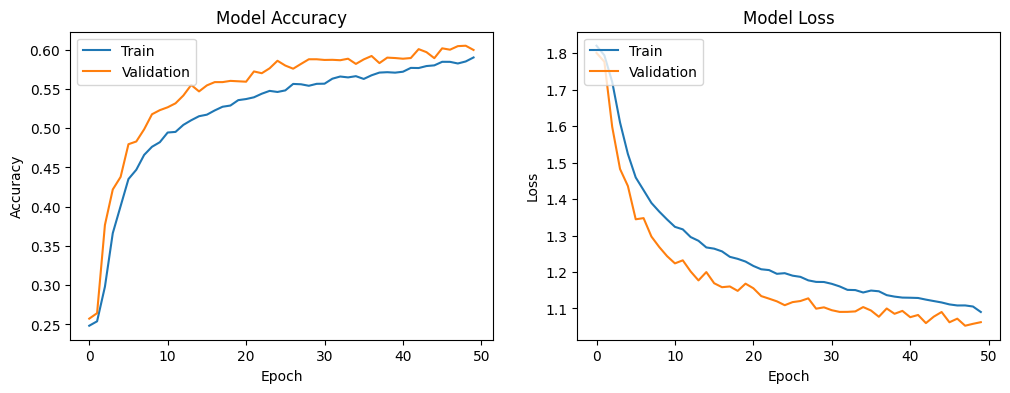

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()


# Plot the training history
plot_training_history(history)


In [12]:
from keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

In [13]:
# Load the pre-trained VGG16 model without the top classification layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the VGG16 base layers (these won't be trained)
vgg_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [14]:
       # Build the Sequential model
model2 = Sequential()

# Add the pre-trained VGG16 base model
model2.add(vgg_base)

# Add a pooling layer to reduce the output from the VGG model (either Flatten or GlobalAveragePooling)
model2.add(GlobalAveragePooling2D())

# Add Dense layers on top for the new classification task
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(0.25))

# Output layer for 7 classes (adjust the number based on your dataset)
model2.add(Dense(units=7, activation='softmax'))

In [15]:
# Compile the model
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 333s 919ms/step - accuracy: 0.2670 - loss: 1.7961 - val_accuracy: 0.3628 - val_loss: 1.6266
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 330s 916ms/step - accuracy: 0.3419 - loss: 1.6541 - val_accuracy: 0.3635 - val_loss: 1.5990
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 331s 918ms/step - accuracy: 0.3553 - loss: 1.6333 - val_accuracy: 0.3893 - val_loss: 1.5703
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 382s 920ms/step - accuracy: 0.3704 - loss: 1.5970 - val_accuracy: 0.3980 - val_loss: 1.5603
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 381s 918ms/step - accuracy: 0.3862 - loss: 1.5776 - val_accuracy: 0.3984 - val_loss: 1.5495
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 330s 916ms/step - accuracy: 0.3798 - loss: 1.5828 - val_accuracy: 0.3957 - val_loss: 1.5480
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 330s 917ms/step - accuracy: 0.3882 - loss: 1.5662 - val_accuracy: 0.4053 - val_loss: 1.5331
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 384s 924ms/step - accuracy: 0.3908 -

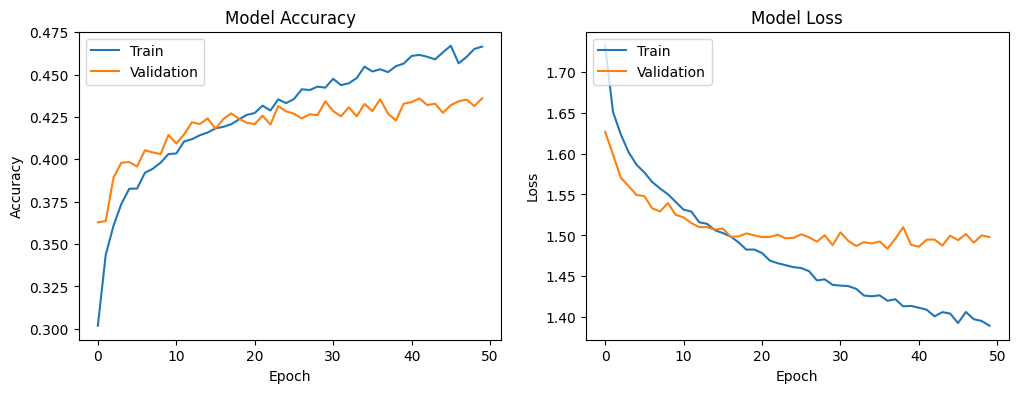

In [16]:
# Plot training accuracy and loss
plot_training_history(history2)

In [17]:
# save model 
model2.save('my_model.h5')

## Notes : 
- GlobalAveragePooling2D : 
    - The VGG16 model (vgg_base) outputs a feature map (high-dimensional tensor) rather than predictions, as we set include_top=False. This means that the model does not include its original fully connected (dense) layers and output layer, which are responsible for classification.
    - This layer takes the average of all elements in each feature map, converting the 2D spatial dimensions (height and width) into a single number. It effectively reduces the output dimensionality while retaining important information.
    - Pooling or flattening reduces the dimensionality of the output from the pre-trained network, making it suitable for the fully connected layers you add next.

<br>

- Dense Layers 
    - The Dense (fully connected) layers are necessary for making the final classification based on the features extracted by the pre-trained model
    - It learns to combine the features extracted by VGG16 and adapt them to the specific task at hand.
        
<br>

- Dropout Layer (0.25):
    - Dropout is a regularization technique that randomly sets 25% of the neurons to 0 during training, helping to prevent overfitting.
    
 <br>
    
- Dense Layer 2 (64 units):
    - This is an additional fully connected layer that allows the model to learn more complex patterns and refine the features learned by the first dense layer.
 
<br>
 
![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*dakaUOSfAFoexZRZ.png)